In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz

In [2]:
df_raw = pd.read_csv('./data/Ames_HousePrice_processed.csv', index_col=0)
print(df_raw.shape)
df_raw.columns

(2579, 90)


Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive'

In [3]:
df_raw

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ExteriorSF,AgeAtSale,TotalFullBath,TotalHalfBath,GarageAgeAtSale,Prop_Addr,MA_Ownr1,MA_Ownr2,Latitude,Longitude
0,909176150,856,126000,30,RL,0.0,7890,Pave,No alley,Reg,...,7034,71,2.0,0.0,71.0,436 HAYWARD AVE,"GREINER, RODNEY & CELIA",NaN,42.018564,-93.651619
1,905476230,1049,139500,120,RL,42.0,4235,Pave,No alley,Reg,...,3186,25,3.0,0.0,25.0,3416 WEST ST,"HUBERT, JOHN F & GRETTA R",NaN,42.024855,-93.663671
2,911128020,1001,124900,30,C (all),60.0,6060,Pave,No alley,Reg,...,5059,77,1.0,0.0,77.0,320 S 2ND ST,"SKLENAR, TIM","CARNEY, SARAH",42.021548,-93.614068
3,535377150,1039,114000,70,RL,80.0,8146,Pave,No alley,Reg,...,7429,109,1.0,0.0,69.0,1524 DOUGLAS AVE,"MILLARD, TAMMY",NaN,42.037391,-93.612207
4,534177230,1665,227000,60,RL,70.0,8400,Pave,No alley,Reg,...,7590,8,3.0,1.0,8.0,2304 FILLMORE AVE,"SEBBAG, LIONEL","LEVIN, ALISON P",42.044554,-93.631818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2574,903205040,952,121000,30,RL,0.0,8854,Pave,No alley,Reg,...,7902,93,1.0,0.0,93.0,1021 RIDGEWOOD AVE,"KRIER, DANIEL A",NaN,42.032102,-93.626373
2575,905402060,1733,139600,20,RL,0.0,13680,Pave,No alley,IR1,...,11947,54,2.0,0.0,54.0,3619 MARY CIR,"SCHEIBE, KEVIN & MARY",NaN,42.027669,-93.666138
2576,909275030,2002,145000,90,RH,82.0,6270,Pave,No alley,Reg,...,5269,58,2.0,0.0,58.0,2140 SUNSET DR 2142,"SALTER, BENJAMIN SCOTT & SALTER, TERRILL JOHNSTON",NaN,42.020129,-93.643832
2577,907192040,1842,217500,60,RL,0.0,8826,Pave,No alley,Reg,...,7841,7,3.0,1.0,7.0,5319 CLEMENS BLVD,"POLAND, CHRISTOPHER A & ANDREA C",NaN,42.016802,-93.689748


In [4]:
feature_cols = ['GrLivArea', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'ExteriorSF',
       'AgeAtSale', 'TotalFullBath', 'TotalHalfBath', 'GarageAgeAtSale']

X = pd.get_dummies(df_raw[feature_cols])
y = df_raw['SalePrice']

We will first see how a random forest regressor performs on the dataset with  just the minimal feature engineering obtained from preprocessing.

In [5]:
rf = RandomForestRegressor()

defaultparams = {
    'n_estimators': [100],
}

rf_cv = GridSearchCV(rf, defaultparams)
rf_cv.fit(X, y)
rf_cv.score(X, y)

0.9845053359546274

<AxesSubplot:>

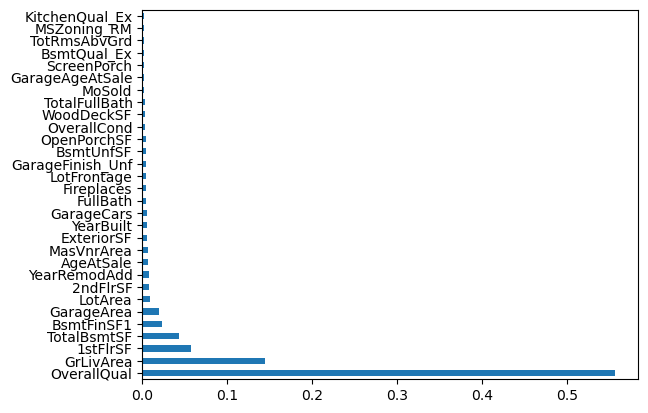

In [6]:
default_rf = rf_cv.best_estimator_
featureimportances = pd.Series(default_rf.feature_importances_, index=X.columns)
featureimportances.nlargest(30).plot(kind='barh')

<AxesSubplot:ylabel='Frequency'>

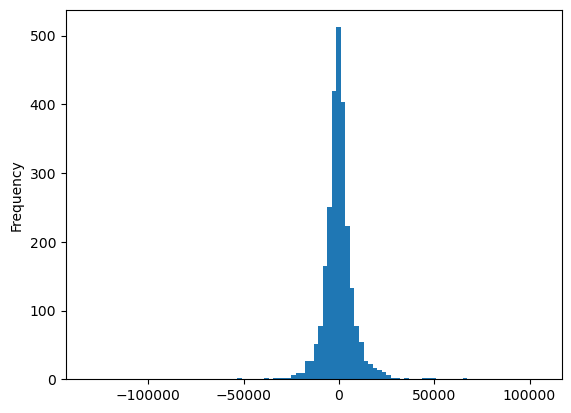

In [7]:
residuals = y - default_rf.predict(X)
residuals.plot.hist(bins=100)

In [8]:
np.mean(residuals**2)

87228230.93990146

In [9]:
np.sqrt(np.mean(residuals**2))

9339.60550237008

We already have good R^2, but the feature importances suggest that this is primarily being driven by an indicator of overall quality of the house's material and finish and features tracking square footage. We will try to engineer the features to yield a model that has more insight into how fungible features impact sale price. Our overall approach will be to keep track of the features that we cannot change, but try to discretize them so that the model cannot simply encode the solution into (combinations of) continuous variables.

## Feature engineering

In [10]:
df_new = df_raw.copy()

#### Target
'SalePrice',  

For obvious reasons, we will not be touching this.

#### Building square footage features
'GrLivArea', 
'1stFlrSF',
'2ndFlrSF', 
'LowQualFinSF', 
'LotArea', 
'ExteriorSF',
'BsmtFinSF1', 
'BsmtFinSF2', 
'BsmtUnfSF', 
'TotalBsmtSF',

<AxesSubplot:xlabel='GrLivArea', ylabel='LotArea'>

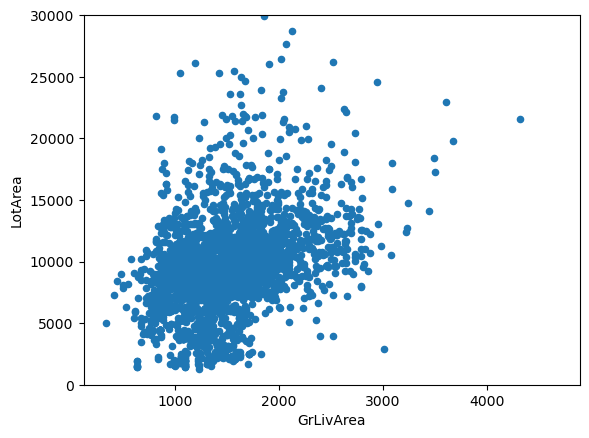

In [11]:
df_raw.plot.scatter(x='GrLivArea', y='LotArea', ylim = (0, 30000))

The above-ground living area is not a great guide to lot area.

<AxesSubplot:xlabel='GrLivArea', ylabel='1stFlrSF'>

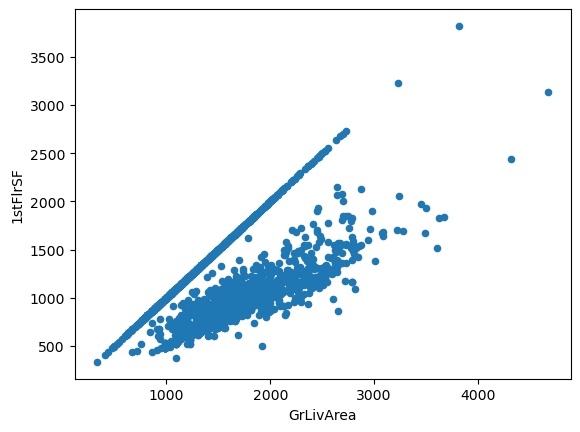

In [12]:
df_raw.plot.scatter(x='GrLivArea', y='1stFlrSF')

<AxesSubplot:xlabel='GrLivArea', ylabel='TotalBsmtSF'>

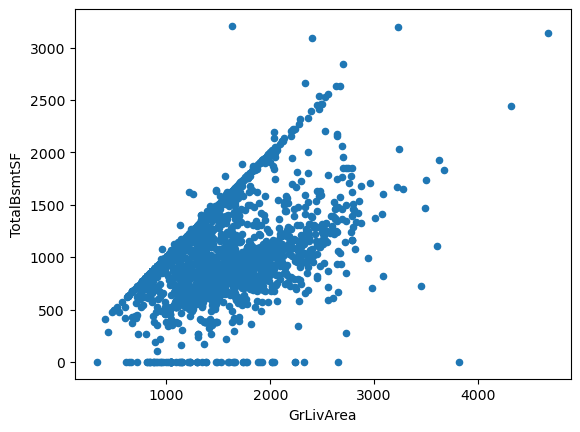

In [13]:
df_raw.plot.scatter(x='GrLivArea', y='TotalBsmtSF')

We will generate TotalSF and keep ExteriorSF since a house's sf is not a good guide to the lot sf. We will toss out the details regarding the makeup of the square footage.

In [14]:
df_new['TotalSF'] = df_new['GrLivArea'] + df_new['TotalBsmtSF']
df_new['2Stories'] = df_new['2ndFlrSF'] > 0
df_new = df_new.drop(['GrLivArea', '1stFlrSF', '2ndFlrSF', 
                      'LowQualFinSF', 'LotArea', 'BsmtFinSF1', 
                      'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF'], axis=1) # note we keep ExteriorSF

#### Building quality features
'KitchenQual',
'OverallQual', 
'OverallCond',
'Functional', 
'YearBuilt', 
'AgeAtSale', 
'YearRemodAdd', 

<AxesSubplot:xlabel='AgeAtSale', ylabel='OverallQual'>

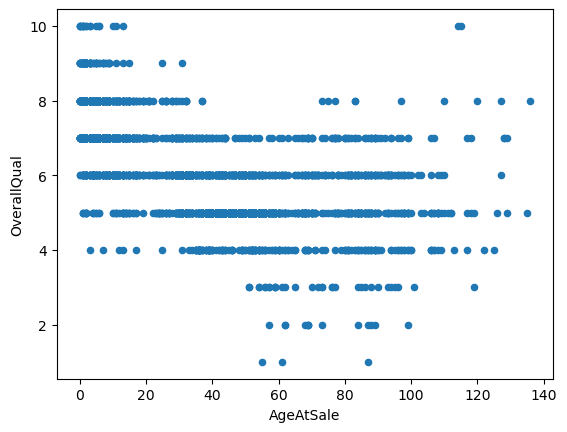

In [15]:
df_raw.plot.scatter(x='AgeAtSale', y='OverallQual')

<AxesSubplot:xlabel='AgeAtSale', ylabel='OverallCond'>

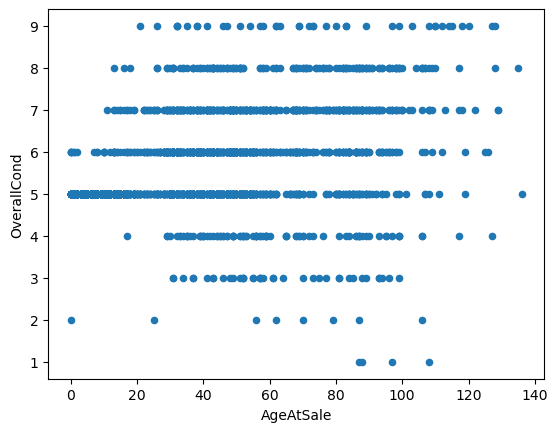

In [16]:
df_raw.plot.scatter(x='AgeAtSale', y='OverallCond')

<AxesSubplot:title={'center':'SalePrice'}, xlabel='OverallQual'>

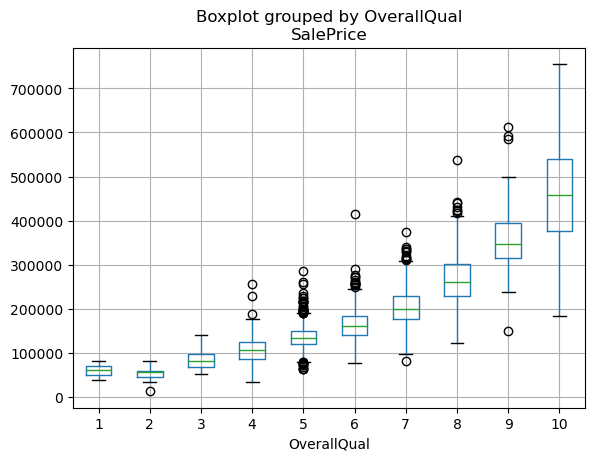

In [17]:
df_raw.boxplot(by='OverallQual', column='SalePrice')

<AxesSubplot:title={'center':'SalePrice'}, xlabel='OverallCond'>

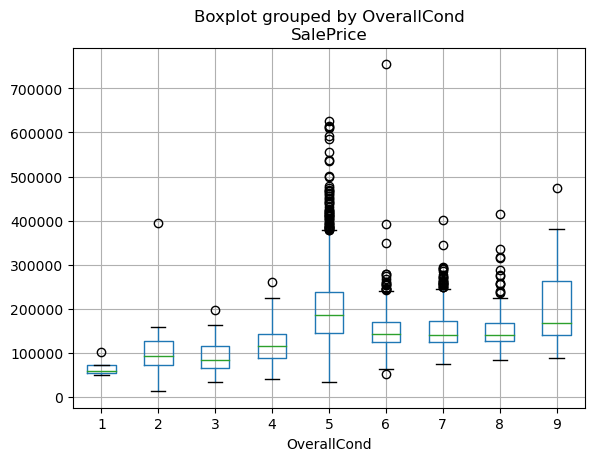

In [18]:
df_raw.boxplot(by='OverallCond', column='SalePrice', )

In [19]:
# note that if there has been no remodel, YearRemodAdd is date of original construction
df_new['TimeSinceLastWork'] = df_new['YrSold'] - df_new['YearRemodAdd']
df_new = df_new.drop(['KitchenQual', 'OverallQual', 'OverallCond', 'Functional', 
             'YearBuilt', 'YearRemodAdd'], axis=1)

#### Room counts features
'BsmtFullBath', 
'BsmtHalfBath', 
'FullBath',
'HalfBath', 
'BedroomAbvGr', 
'KitchenAbvGr', 
'TotRmsAbvGrd', 
'TotalFullBath', 
'TotalHalfBath', 

In [20]:
df_new = df_new.drop(['BsmtFullBath', 'BsmtHalfBath', 
                      'FullBath', 'HalfBath', 'KitchenAbvGr', 
                      'TotRmsAbvGrd'], axis=1)
# keep BedroomAbvGr, TotalFullBath, TotalHalfBath

#### Property features
'LotShape', 
'LandContour',
'LotConfig', 
'LotFrontage', 
'LandSlope', 

In [21]:
df_new = df_new.drop(['LotShape', 'LandContour', 'LotConfig', 'LotFrontage', 'LandSlope'], axis=1)
# drop all of these

#### Nearby area and access features
'Neighborhood', 
'MSZoning',
'Condition1', (note that this specifies proximity to certain conditions)
'Condition2', 
'Street', 
'Alley', 
'PavedDrive', 

In [22]:
df_new = df_new.drop(['MSZoning', 'Neighborhood', 'Condition1', 'Condition2', 'Street', 'Alley', 'PavedDrive'], axis=1)
# drop all

#### Building type and detail features
'BldgType', 
'HouseStyle', 
'MSSubClass', 

In [23]:
# df_new['MSSubClass'] = df_new['MSSubClass'].astype('category') # MSSubClass more-or-less includes other features
df_new = df_new.drop(['MSSubClass', 'BldgType', 'HouseStyle'], axis=1)

#### Building exterior features
'RoofStyle', 
'RoofMatl',
'Exterior1st',
'Exterior2nd', 
'MasVnrType', 
'MasVnrArea', 
'ExterQual',
'ExterCond',

In [24]:
df_new = df_new.drop(['RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 
                      'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond'], axis=1)

#### Basement features
'Foundation', 
'BsmtQual', 
'BsmtCond', 
'BsmtExposure', 
'BsmtFinType1',
'BsmtFinType2', 

In [25]:
df_new = df_new.drop(['Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'], axis=1)

#### Garage features
'GarageType',
'GarageFinish', 
'GarageCars', 
'GarageArea', 
'GarageQual', 
'GarageCond',
'GarageAgeAtSale',

In [26]:
df_new = df_new.drop(['GarageType', 'GarageFinish', 'GarageArea', 
                      'GarageQual', 'GarageCond', 'GarageAgeAtSale'], axis=1)
# keep GarageCars

#### Electricity, Climate Control, and Utilities
'Heating', 
'HeatingQC', 
'CentralAir', 
'Electrical', 
'Utilities', 

In [27]:
df_new = df_new.drop(['Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'Utilities'], axis=1)

#### Fireplaces
'Fireplaces', 
'FireplaceQu', 

In [28]:
df_new['HasFireplace'] = df_new['Fireplaces'] > 1
df_new = df_new.drop(['Fireplaces', 'FireplaceQu'], axis=1)

#### Porch features
'WoodDeckSF', 
'OpenPorchSF', 
'EnclosedPorch', 
'3SsnPorch',
'ScreenPorch', 

In [29]:
df_new['HasPorch'] = np.sum(df_new[['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']], axis=1) > 0
df_new = df_new.drop(['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch'], axis=1)

#### Pool features
'PoolArea', 
'PoolQC', 

In [30]:
df_new['HasPool'] = df_new['PoolArea'] > 0
df_new = df_new.drop(['PoolArea', 'PoolQC'], axis=1)

#### Miscellaneous features
'Fence', 
'MiscFeature', 
'MiscVal',

In [31]:
df_new = df_new.drop(['Fence', 'MiscFeature', 'MiscVal'], axis=1)

#### Sale features
'MoSold', 
'YrSold', 
'SaleType', 
'SaleCondition', 

In [32]:
df_new = df_new.loc[df_new['SaleCondition'] == 'Normal']
df_new = df_new.drop(['MoSold', 'YrSold', 'SaleType', 'SaleCondition'], axis=1)

#### Identifying features (do not use)
'PID',
'Prop_Addr', 
'MA_Ownr1', 
'MA_Ownr2', 
'Latitude', 
'Longitude'

In [33]:
df_new = df_new.drop(['PID', 'Prop_Addr', 'MA_Ownr1', 'MA_Ownr2', 'Latitude', 'Longitude'], axis=1)

In [34]:
df_new.columns

Index(['SalePrice', 'BedroomAbvGr', 'GarageCars', 'ExteriorSF', 'AgeAtSale',
       'TotalFullBath', 'TotalHalfBath', 'TotalSF', '2Stories',
       'TimeSinceLastWork', 'HasFireplace', 'HasPorch', 'HasPool'],
      dtype='object')

## Random Forest Regression on New Features

In [35]:
df_new.columns

Index(['SalePrice', 'BedroomAbvGr', 'GarageCars', 'ExteriorSF', 'AgeAtSale',
       'TotalFullBath', 'TotalHalfBath', 'TotalSF', '2Stories',
       'TimeSinceLastWork', 'HasFireplace', 'HasPorch', 'HasPool'],
      dtype='object')

In [36]:
X_new = df_new.drop('SalePrice', axis=1)
y_new = df_new['SalePrice']

In [37]:
X_new.dtypes

BedroomAbvGr           int64
GarageCars           float64
ExteriorSF             int64
AgeAtSale              int64
TotalFullBath        float64
TotalHalfBath        float64
TotalSF              float64
2Stories                bool
TimeSinceLastWork      int64
HasFireplace            bool
HasPorch                bool
HasPool                 bool
dtype: object

In [38]:
rf = RandomForestRegressor()

paramgrid = {
    'n_estimators': [50, 100, 150, 200],
    'min_samples_leaf': [1, 3, 5],
}

rf_cv = GridSearchCV(rf, paramgrid, cv=10)
rf_cv.fit(X_new, y_new)
rf_cv.score(X_new, y_new)

0.9831411927603572

In [39]:
rf_cv.best_params_

{'min_samples_leaf': 1, 'n_estimators': 100}

<AxesSubplot:>

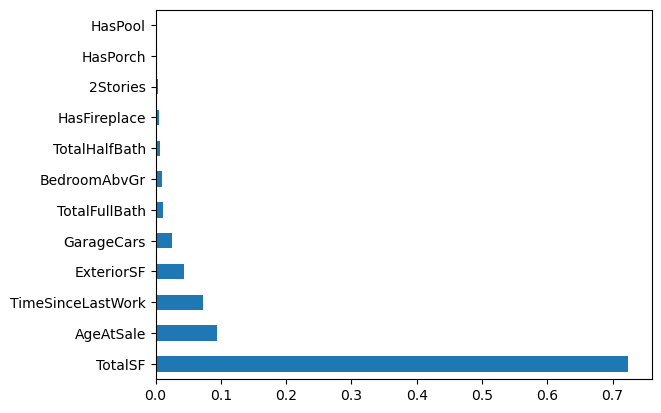

In [40]:
best_rf = rf_cv.best_estimator_
featureimportances = pd.Series(best_rf.feature_importances_, index=X_new.columns)
featureimportances.nlargest(20).plot(kind='barh')

<AxesSubplot:ylabel='Frequency'>

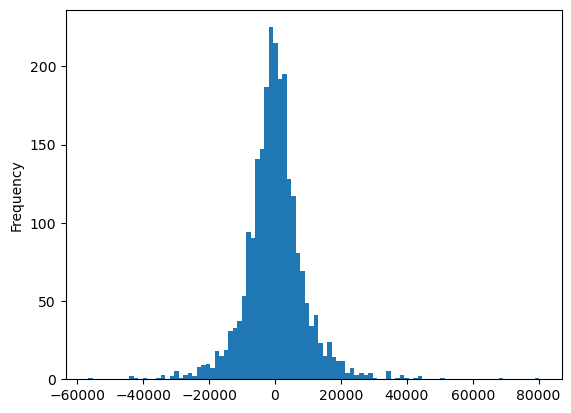

In [41]:
residuals = y_new - best_rf.predict(X_new)
residuals.plot.hist(bins=100)

In [42]:
np.mean(residuals**2)

84901252.75523585

In [43]:
np.sqrt(np.mean(residuals**2))

9214.187579772612

In [44]:
df_expanded = df_new.copy()

In [45]:
# new features from group meeting
df_expanded['Neighborhood'] = df_raw['Neighborhood']
df_expanded['RoofMatl'] = df_raw['RoofMatl']
df_expanded['KitchenQual'] = df_raw['KitchenQual']
df_expanded['FinBasmt'] = (df_raw.TotalBsmtSF - df_raw.BsmtUnfSF) > 0 

df_expanded['Bathrooms'] = df_raw['TotalFullBath'] + (df_raw['TotalHalfBath'] / 2) + df_raw['BsmtFullBath'] + (df_raw['BsmtHalfBath'] / 2)
df_expanded = df_expanded.drop(['TotalFullBath', 'TotalHalfBath'], axis=1)

In [46]:
df_expanded

,SalePrice,BedroomAbvGr,GarageCars,ExteriorSF,AgeAtSale,TotalSF,2Stories,TimeSinceLastWork,HasFireplace,HasPorch,HasPool,Neighborhood,RoofMatl,KitchenQual,FinBasmt,Bathrooms
0,126000,2,2.0,7034,71,1712.0,False,60,False,True,False,SWISU,CompShg,TA,True,3.0
1,139500,2,1.0,3186,25,2098.0,False,25,False,True,False,Edwards,CompShg,Gd,True,4.0
2,124900,2,1.0,5059,77,1838.0,False,0,False,True,False,IDOTRR,CompShg,Gd,True,1.0
3,114000,2,1.0,7429,109,1444.0,True,6,False,True,False,OldTown,CompShg,TA,False,1.0
4,227000,3,2.0,7590,8,2475.0,True,8,False,True,False,NWAmes,CompShg,Gd,True,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2574,121000,2,1.0,7902,93,1904.0,False,59,False,True,False,BrkSide,CompShg,Fa,False,1.0
2575,139600,4,2.0,11947,54,1733.0,False,54,False,False,False,Edwards,CompShg,TA,False,2.0
2576,145000,4,3.0,5269,58,3003.0,True,57,False,False,False,Crawfor,CompShg,TA,True,2.0
2577,217500,3,2.0,7841,7,2827.0,True,7,False,True,False,CollgCr,CompShg,Gd,True,4.5


In [47]:
X_expanded = pd.get_dummies(df_expanded.drop('SalePrice', axis=1))
y_expanded = df_expanded['SalePrice']

In [48]:
rf_cv.fit(X_expanded, y_expanded)
rf_cv.score(X_expanded, y_expanded)

0.9851655485439269

In [49]:
rf_cv.best_params_

{'min_samples_leaf': 1, 'n_estimators': 100}

<AxesSubplot:>

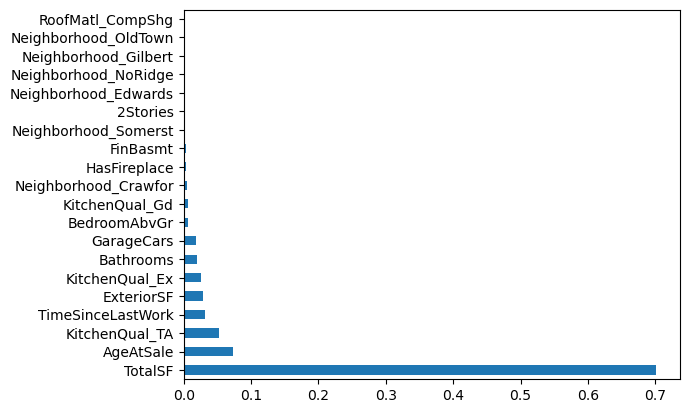

In [50]:
best_rf = rf_cv.best_estimator_
featureimportances = pd.Series(best_rf.feature_importances_, index=X_expanded.columns)
featureimportances.nlargest(20).plot(kind='barh')

<AxesSubplot:ylabel='Frequency'>

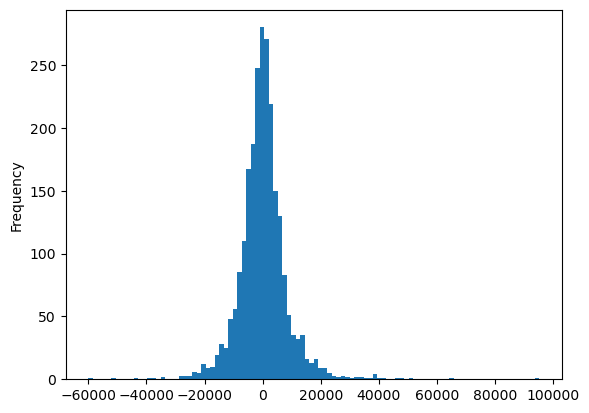

In [51]:
residuals = y_expanded - best_rf.predict(X_expanded)
residuals.plot.hist(bins=100)

In [52]:
np.mean(residuals**2)

74706561.06653622

In [53]:
np.sqrt(np.mean(residuals**2))

8643.29572943887